# Linear decomposition of approximate multi-controlled single qubit gates

## libraries

In [1]:
import numpy as np
from qclib.gates.ldmcu import Ldmcu
from qclib.gates.mcu import MCU
from qiskit import QuantumRegister, QuantumCircuit
import matplotlib.pyplot as plt
from qclib.util import get_cnot_count
from cost import Cost

## Objects and parameters

In [2]:
u = np.array([[0,1], [1,0]]) # X gate
cost = Cost
error = 1e-3
mcu_approx_dummy = MCU(u, num_controls=100, error=error)
base_ctrl_qubits_mcx = mcu_approx_dummy._get_num_base_ctrl_qubits(u, error)

n_base = base_ctrl_qubits_mcx

print(
    'The base circuit have %d qubits for error = %.3f' 
    %(n_base, error)
)

The base circuit have 13 qubits for error = 0.001


In [3]:
cnot_approx=[]
cnot_original = []
base_limit = n_base + 25
for n_controls in range(base_ctrl_qubits_mcx, base_limit):

    controls = QuantumRegister(n_controls)
    target = QuantumRegister(1)
    circuit_approx = QuantumCircuit(controls, target)
    MCU.mcu(circuit_approx, u, controls, target, error)

    cnot_approx.append(get_cnot_count(circ = circuit_approx))
    circuit_og = QuantumCircuit(controls, target)
    Ldmcu.ldmcu(circuit_og, u, controls, target)
    cnot_original.append(get_cnot_count(circ = circuit_og))

print(get_cnot_count(circ = circuit_og))
print(get_cnot_count(circ = circuit_approx))

5330
1504


<a id='figure-11'></a>
## Fig. 9. Comparison of the mathematical upper bound for the count of CNOTs of multi-controlled U (2) gates. nb = 13, error = 0,001.


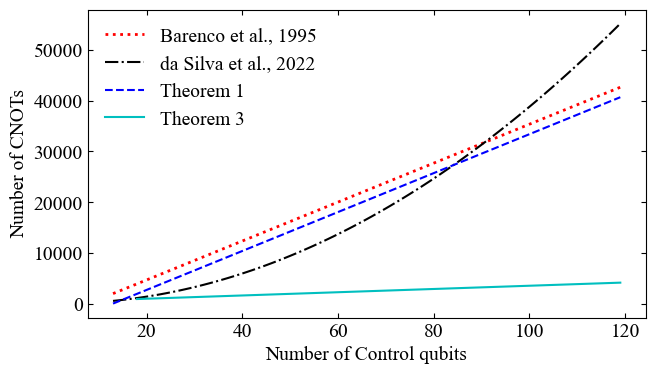

In [8]:
x0 = np.arange(n_base, 120)
x1 = np.arange(n_base+5, 120)

k_barenco = Cost.get_k_barenco(error)
y_0 = [cost.c_barenco_rec(xi, 0, k_barenco) for xi in x0]
y_1 = cost.exact_decomposition(x0)
y_2 = cost.theorem_1(n_base, x0)
y_3 = [cost.theorem_3(n_base, xi - n_base) for xi in x1] 

plt.plot(x0, y_0, color='red', linestyle=':', linewidth=2)  # Barenco et al., 1995
plt.plot(x0, y_1, 'k-.')                                    # da Silva et al., 2022
plt.plot(x0, y_2, 'b--')                                    # Theorem 1
plt.plot(x1, y_3, 'c-')                                     # Theorem 3

plt.legend(
    ('Barenco et al., 1995', 'da Silva et al., 2022', 'Theorem 1', 'Theorem 3'),
    loc = 'upper left', shadow=False, frameon=False
)

plt.tick_params(axis='x', direction='in', bottom=True, top=True)
plt.tick_params(axis='y', direction='in', left=True, right=True)

plt.xlabel('Number of Control qubits')
plt.ylabel('Number of CNOTs')

plt.rcParams.update({
    "figure.figsize": (7.2, 4.0),
    "font.family": "Times New Roman",
    "font.size": 14
})

plt.savefig('images/9-analitico_pra_t1_t3_review.svg', dpi=300)
plt.show()

### Table of CNOT cost

In [5]:
"""for 100 control qubits: """

def table(arr0, arr1, arr2, arr3, arr4):
    header1 = '# control qubits'
    header2 = 'Barenco et al., 1995'
    header3 = 'da Silva et al., 2022'
    header4 = 'Theorem 1'
    header5 = 'theorem 3'
    
    width1 = len(header1)
    width2 = len(header2)
    width3 = len(header3)
    width4 = len(header4)
    width5 = len(header5)
    
    width1 += 2
    width2 += 2
    width3 += 2
    width4 += 2
    width5 += 2
    
    string = (f'{header1:<{width1}}'
              f'{header2:<{width2}}'
              f'{header3:<{width3}}'
              f'{header4:<{width4}}'
              f'{header5:<{width5}}\n')
    string += '-' * (width1 + width2 + width3 + width4 + width5) + '\n'
    for i in range(27, 100, 20):
        c0 = arr0[i]
        c1 = arr1[i]
        c2 = arr2[i]
        c3 = arr3[i]
        c4 = arr4[i-5]
        values = (f'{c0:<{width1}}'
                  f'{c1:<{width2}}'
                  f'{c2:<{width3}}'
                  f'{c3:<{width4}}'
                  f'{c4:<{width5}}\n')
        string += values
    
    e = 'error = 0,001\n'
    string += '-' * (width1 + width2 + width3 + width4 + width5) + '\n'
    string += e
    string += '-' * (width1 + width2 + width3 + width4 + width5) + '\n'
    return string


In [6]:
print(table(x0, y_0, y_1, y_2, y_3))

# control qubits  Barenco et al., 1995  da Silva et al., 2022  Theorem 1  theorem 3  
-------------------------------------------------------------------------------------
40                12336                 5930                   10368      1600       
60                20016                 13690                  18048      2240       
80                27696                 24650                  25728      2880       
100               35376                 38810                  33408      3520       
-------------------------------------------------------------------------------------
error = 0,001
-------------------------------------------------------------------------------------


<a id='figure-12'></a>
## Fig. 10. Comparison of Quantum Circuit Decomposition CNOT cost for multi-controlled U = X gates using different methods

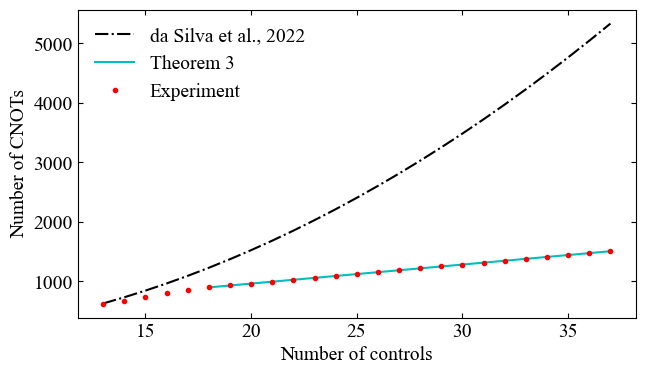

In [9]:
x_0 = list(range(base_ctrl_qubits_mcx, base_limit))
x_1 = x_0[5:]

theorem_3 = [
    cost.theorem_3(n_base, xi - n_base) for xi in x_1
]

plt.plot(x_0, cnot_original, 'k-.')
plt.plot(x_1, theorem_3, 'c-')
plt.plot(x_0, cnot_approx, 'r.')

plt.legend(
    ('da Silva et al., 2022', 'Theorem 3', 'Experiment'),
    loc='upper left', shadow=False, frameon=False
)

plt.xlabel('Number of controls')
plt.ylabel('Number of CNOTs')

plt.tick_params(axis='x', direction='in', bottom=True, top=True)
plt.tick_params(axis='y', direction='in', left=True, right=True)

plt.rcParams.update({
    "figure.figsize": (7.2, 4.0),
    "font.family": "Times New Roman",
    "font.size": 14
})

plt.savefig('images/10-comparacao_analito_numerico.svg', dpi=300)
plt.show()